In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [35]:
data_loc = {
    "clip":"/opt/Neuro-Symbolic-Video-Frame-Search/store/nsvs_artifact/experiment_2.1_nsvs_ltl/clip/clip_benchmark_search_result_20231014_230610.csv",
    "yolo":"/opt/Neuro-Symbolic-Video-Frame-Search/store/nsvs_artifact/experiment_2.1_nsvs_ltl/yolo/yolo_benchmark_search_result_20231014_224708.csv",
    "dino":"/opt/Neuro-Symbolic-Video-Frame-Search/store/nsvs_artifact/experiment_2.1_nsvs_ltl/dino/dino_benchmark_search_result_20231012_131832.csv"
}
result_dict = {}

for k,v in data_loc.items():
    df = pd.read_csv(v)
    header = ["dataset","ltl_group","ltl_formula","number_of_frame","cv_model","cv_model_weight","accuracy","precision","recall","f1_score","mapping_false_threshold","mapping_true_threshold","mapping_param_x0","mapping_param_k"]
    df.columns = header
    result_dict[k] = df


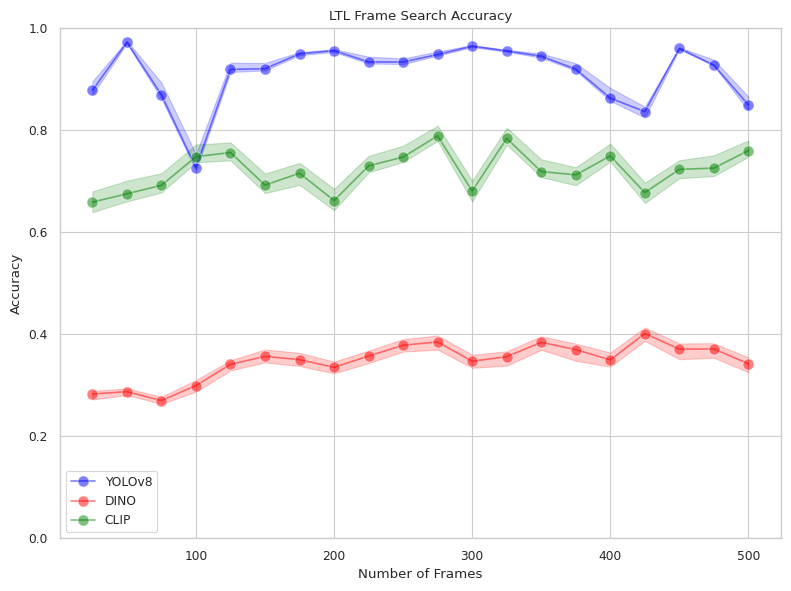

In [36]:
# 1. YOLO DF
# Filter the DataFrame to include only rows where cv_model_weight is 'yolo8x'
yolo_df = result_dict["yolo"]
df_yolo8x = yolo_df[yolo_df['cv_model_weight'] == 'yolov8x']

# 2. DINO DF
dino_df =result_dict["dino"]

# 3. CLIP DF
clip_df =result_dict["clip"]

# Set style and context to make the plot look more aesthetically pleasing
sns.set_style("whitegrid")
sns.set_context("paper")

# Create a line plot for accuracy over number of frames for yolo8x weight
plt.figure(figsize=(8, 6))
sns.lineplot(x='number_of_frame', y='accuracy', data=df_yolo8x, marker="o", markersize=8, color="blue", label='YOLOv8', alpha=0.5, errorbar=('ci', 20))
sns.lineplot(x='number_of_frame', y='precision', data=dino_df, marker="o", markersize=8, color="red", label='DINO', alpha=0.5, errorbar=('ci', 20))
sns.lineplot(x='number_of_frame', y='precision', data=clip_df, marker="o", markersize=8, color="green", label='CLIP', alpha=0.5, errorbar=('ci', 20))
#sns.lineplot(x='number_of_frame', y='accuracy', data=df_yolo8n, marker="o", markersize=8, color="red", label='yolo8n', alpha=0.5, ci=20)

plt.title('LTL Frame Search Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Frames')

# Show plot
plt.ylim(0.0, 1.0)
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()
# Set y-axis limits


/tmp/ipykernel_2375193/2711437766.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yolo8x['model'] = 'YOLOv8x'


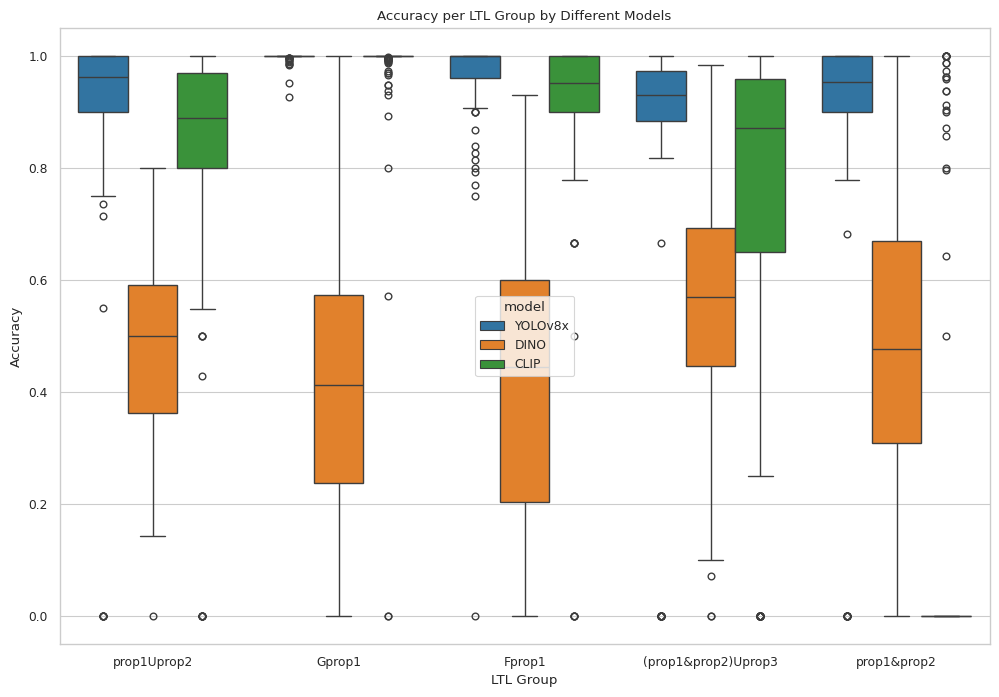

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have df_yolo8x, dino_df, and clip_df with the same columns

# Adding a new column to each DataFrame to identify the model
df_yolo8x['model'] = 'YOLOv8x'
dino_df['model'] = 'DINO'
clip_df['model'] = 'CLIP'

# Concatenating the DataFrames into one
all_data = pd.concat([df_yolo8x, dino_df, clip_df], ignore_index=True)

# Creating a box plot for accuracy of each ltl_group, differentiated by model
plt.figure(figsize=(12, 8))
sns.boxplot(x='ltl_group', y='accuracy', hue='model', data=all_data)
plt.title('Accuracy per LTL Group by Different Models')
plt.ylabel('Accuracy')
plt.xlabel('LTL Group')
plt.show()


/tmp/ipykernel_1010105/3152007620.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 50)` for the same effect.

  ax = sns.lineplot(x='number_of_frame', y='accuracy', data=df_yolo8x, marker="o", markersize=8, color="blue", label='yolo8x', alpha=0.5, ci=50)  # Added error bars
/tmp/ipykernel_1010105/3152007620.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 50)` for the same effect.

  sns.lineplot(x='number_of_frame', y='accuracy', data=df_yolo8n, marker="o", markersize=8, color="red", label='yolo8n', alpha=0.5, ci=50)  # Added error bars


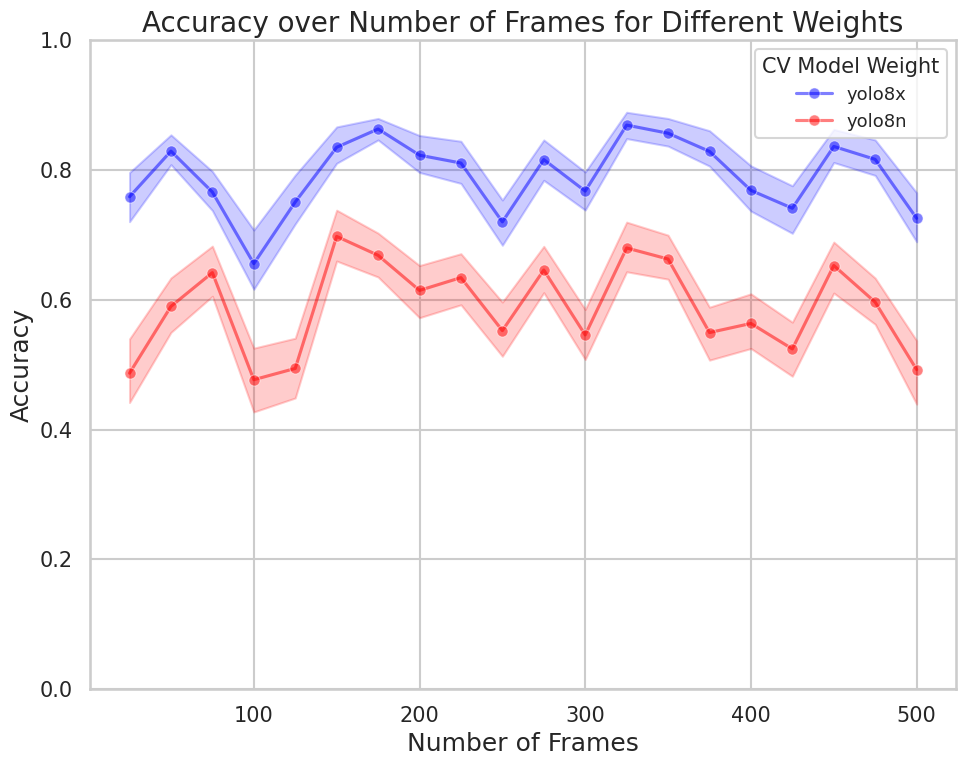

<Figure size 640x480 with 0 Axes>

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame
df_yolo8x = df[df['cv_model_weight'] == 'yolov8x']
df_yolo8n = df[df['cv_model_weight'] == 'yolov8n']

# Set style and context
sns.set_style("whitegrid")
sns.set_context("talk")  # Changed to 'talk' for a larger, more readable plot

# Create a line plot
plt.figure(figsize=(10, 8))  # Increased figure size for better readability
ax = sns.lineplot(x='number_of_frame', y='accuracy', data=df_yolo8x, marker="o", markersize=8, color="blue", label='yolo8x', alpha=0.5, ci=50)  # Added error bars
sns.lineplot(x='number_of_frame', y='accuracy', data=df_yolo8n, marker="o", markersize=8, color="red", label='yolo8n', alpha=0.5, ci=50)  # Added error bars

# Add labels and title with increased font size
ax.set_title('Accuracy over Number of Frames for Different Weights', fontsize=20)
ax.set_ylabel('Accuracy', fontsize=18)
ax.set_xlabel('Number of Frames', fontsize=18)

# Customize ticks for better readability
ax.tick_params(labelsize=15)

# Set y-axis limits
plt.ylim(0.0, 1.0)

# Show grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.legend(title="CV Model Weight", title_fontsize='15', fontsize='13')  # Added legend title
plt.show()

# Save plot to a file
plt.savefig("accuracy_plot.png", dpi=300)  # Save the figure with high resolution


In [ ]:
  # Added error bars
sns.lineplot(x='number_of_frame', y='accuracy', data=df_yolo8n, marker="o", markersize=8, color="red", label='yolo8n', alpha=0.5, ci=68)  # Added error bars

# Add labels and title with increased font size
ax.set_title('Accuracy over Number of Frames for Different Weights', fontsize=20)
ax.set_ylabel('Accuracy', fontsize=18)
ax.set_xlabel('Number of Frames', fontsize=18)

# Customize ticks for better readability
ax.tick_params(labelsize=15)

# Set y-axis limits
plt.ylim(0.0, 1.0)

# Show grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.legend(title="CV Model Weight", title_fontsize='15', fontsize='13')  # Added legend title
plt.show()

# Save plot to a file
plt.savefig("accuracy_plot.png", dpi=300)  # Save the figure with high resolution


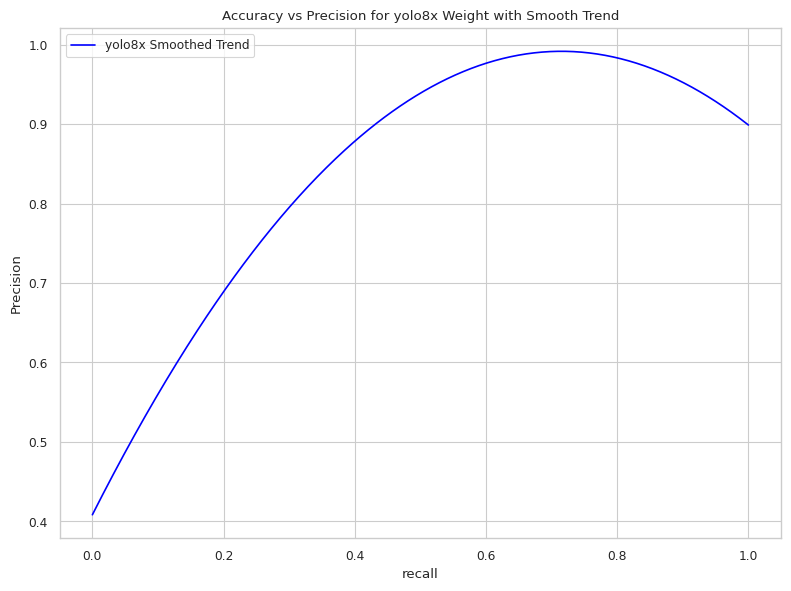

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
# Filter the DataFrame to include only rows where cv_model_weight is 'yolov8x'
df_yolov8x = df[df['cv_model_weight'] == 'yolov8x']

# Polynomial fitting function
def polyfit(x, a, b, c):
    return a * x**2 + b * x + c

# Fit a polynomial to the data
popt, _ = curve_fit(polyfit, df_yolov8x['recall'], df_yolov8x['precision'])

# Generate smoothed data for the plot
x_smooth = np.linspace(df_yolov8x['recall'].min(), df_yolov8x['recall'].max(), 500)
y_smooth = polyfit(x_smooth, *popt)

# Set style and context to make the plot look more aesthetically pleasing
sns.set_style("whitegrid")
sns.set_context("paper")

# Create a line plot for accuracy vs precision for yolo8x weight with a smooth trend
plt.figure(figsize=(8, 6))
plt.plot(x_smooth, y_smooth, color="blue", label='yolo8x Smoothed Trend')
# plt.scatter(df_yolov8x['recall'], df_yolov8x['precision'], color="red", label='yolo8x Data Points')

plt.title('Accuracy vs Precision for yolo8x Weight with Smooth Trend')
plt.ylabel('Precision')
plt.xlabel('recall')

# Show plot
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

,dataset,ltl_group,ltl_formula,number_of_frame,cv_model,cv_model_weight,accuracy,precision,recall,f1_score,mapping_false_threshold,mapping_true_threshold,mapping_param_x0,mapping_param_k


/tmp/ipykernel_1010105/3670817944.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(data=df, x='number_of_frame', y='accuracy', hue='cv_model_weight', marker="o", markersize=8, ci=68)


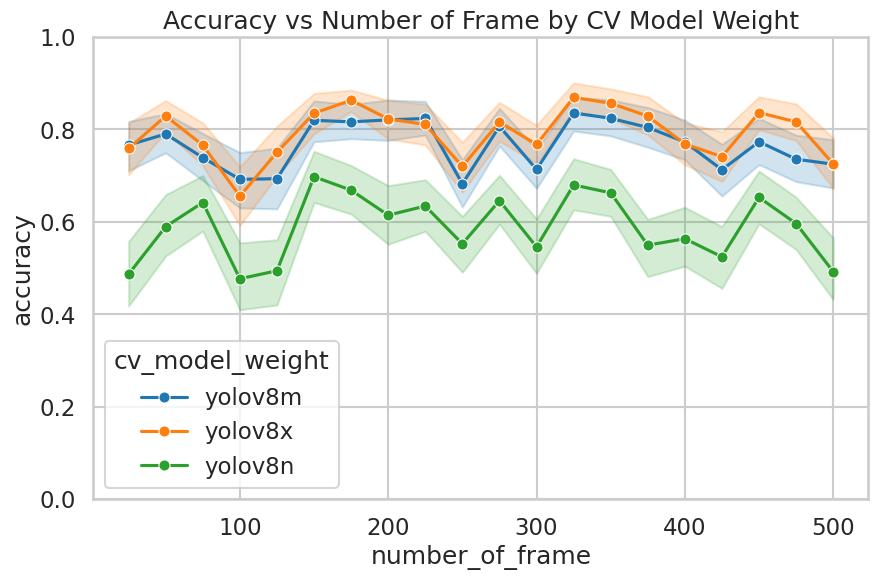

In [21]:
# Create a seaborn lineplot
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='number_of_frame', y='accuracy', hue='cv_model_weight', marker="o", markersize=8, ci=68)
plt.ylim(0.0, 1.0)
# Show plot
plt.title('Accuracy vs Number of Frame by CV Model Weight')
plt.show()

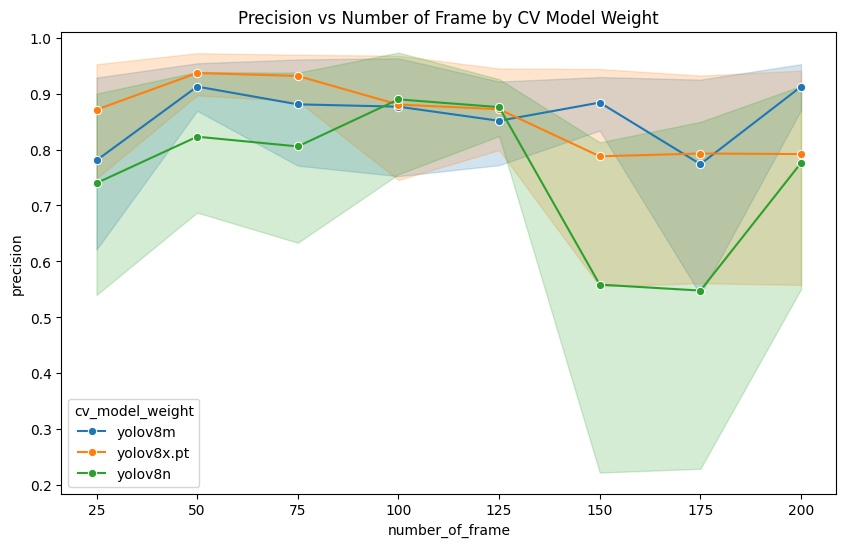

In [121]:
# Create a seaborn lineplot
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='number_of_frame', y='precision', hue='cv_model_weight', marker="o")

# Show plot
plt.title('Precision vs Number of Frame by CV Model Weight')
plt.show()

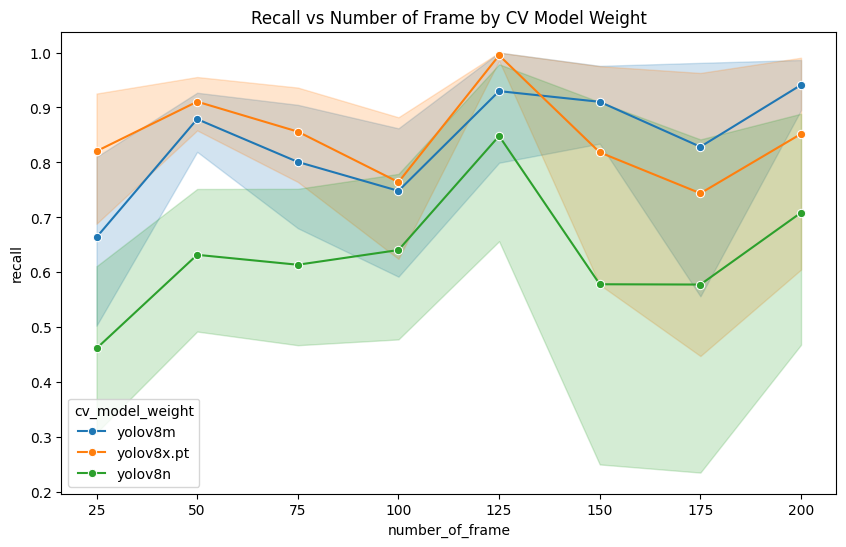

In [122]:
# Create a seaborn lineplot
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='number_of_frame', y='recall', hue='cv_model_weight', marker="o")

# Show plot
plt.title('Recall vs Number of Frame by CV Model Weight')
plt.show()

In [107]:
df

,dataset,ltl_group,ltl_formula,number_of_frame,cv_model,cv_model_weight,accuracy,precision,recall,f1_score,mapping_false_threshold,mapping_true_threshold,mapping_param_x0,mapping_param_k
0,coco,Gprop2,Gfork,50,yolo,yolov8m,0.7500,1.0000,0.7500,0.8571,0.05,0.58,0.1,50
1,coco,Gprop2,Gfork,50,yolo,yolov8x.pt,0.7917,1.0000,0.7917,0.8837,0.05,0.58,0.1,50
2,coco,Gprop2,Gapple,25,yolo,yolov8n,0.2500,1.0000,0.2500,0.4000,0.05,0.58,0.1,50
3,coco,Gprop2,Gapple,25,yolo,yolov8m,0.5000,1.0000,0.5000,0.6667,0.05,0.58,0.1,50
4,coco,Gprop2,Gapple,25,yolo,yolov8x.pt,0.5000,1.0000,0.5000,0.6667,0.05,0.58,0.1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,coco,Fprop1,Fmicrowave,100,yolo,yolov8m,0.7778,1.0000,0.7778,0.8750,0.05,0.58,0.1,50
319,coco,Fprop1,Fmicrowave,100,yolo,yolov8x.pt,0.7778,1.0000,0.7778,0.8750,0.05,0.58,0.1,50
320,coco,Fprop1,Fskateboard,50,yolo,yolov8n,0.7000,0.7778,0.7000,0.7368,0.05,0.58,0.1,50
321,coco,Fprop1,Fskateboard,50,yolo,yolov8m,1.0000,1.0000,1.0000,1.0000,0.05,0.58,0.1,50


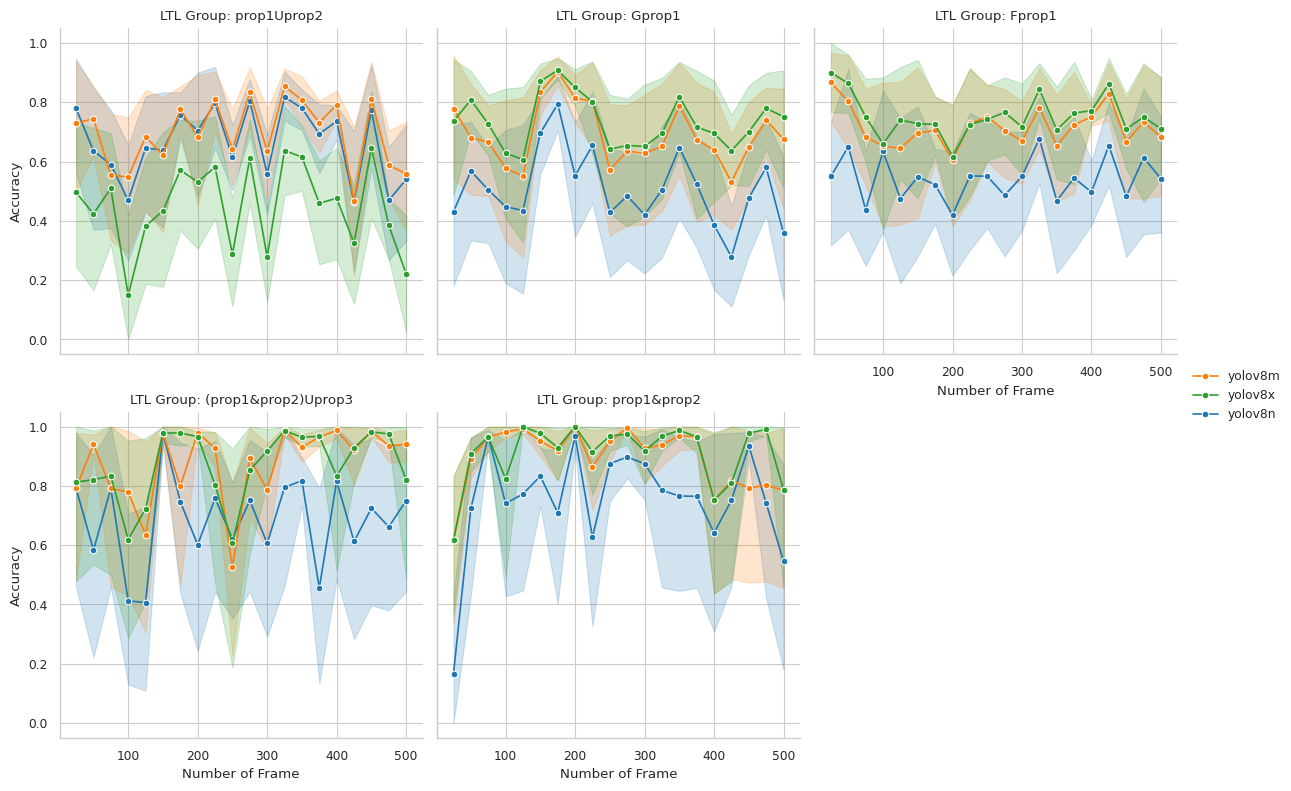

In [12]:
# Create a grid of plots for each ltl_group
g = sns.FacetGrid(df, col="ltl_group", col_wrap=3, height=4, sharey=True)
g.map_dataframe(sns.lineplot, x="number_of_frame", y="accuracy", hue="cv_model_weight", marker="o")

# Add titles and labels
g.set_axis_labels("Number of Frame", "Accuracy")
g.set_titles("LTL Group: {col_name}")

# Add legend
g.add_legend()

# Show plot
plt.show()

/tmp/ipykernel_768713/1300320369.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="ltl_group", y="accuracy", data=avg_df, ci=None)


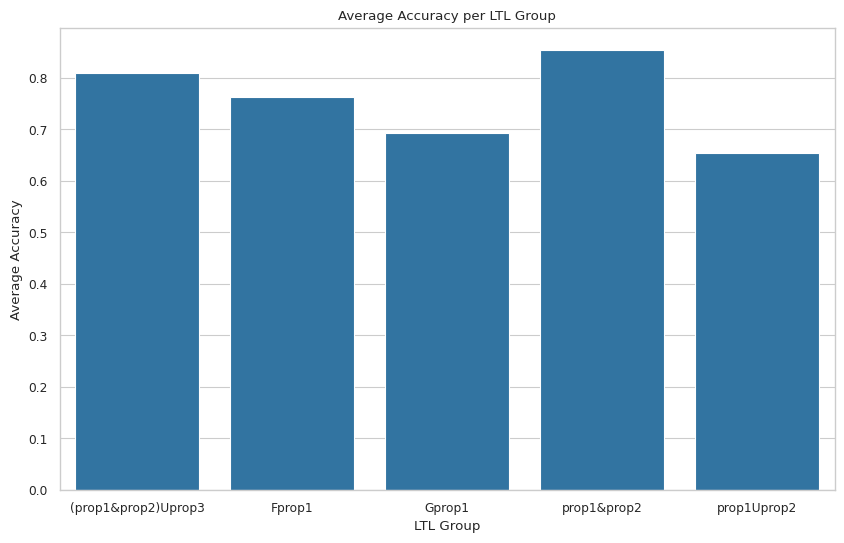

In [11]:
# Calculate the mean accuracy for each LTL group
avg_df = df.groupby("ltl_group")["accuracy"].mean().reset_index()

# Create a bar plot for the mean accuracy of each LTL group
plt.figure(figsize=(10, 6))
sns.barplot(x="ltl_group", y="accuracy", data=avg_df, ci=None)

# Add titles and labels
plt.title("Average Accuracy per LTL Group")
plt.xlabel("LTL Group")
plt.ylabel("Average Accuracy")

# Show plot
plt.show()

/tmp/ipykernel_768713/62080115.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="ltl_group", y="accuracy", hue="cv_model_weight", data=df, ci="sd", capsize=.1)


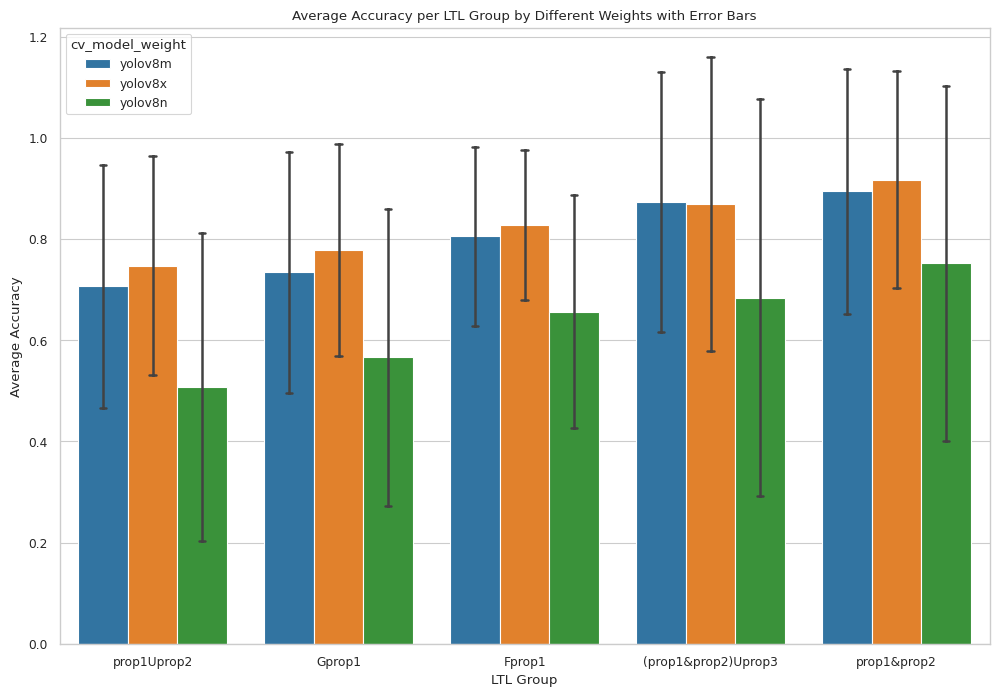

In [12]:

# Create a bar plot for the mean accuracy of each LTL group by different weights
plt.figure(figsize=(12, 8))
sns.barplot(x="ltl_group", y="accuracy", hue="cv_model_weight", data=df, ci="sd", capsize=.1)

# Add titles and labels
plt.title("Average Accuracy per LTL Group by Different Weights with Error Bars")
plt.xlabel("LTL Group")
plt.ylabel("Average Accuracy")

# Show plot
plt.show()

/tmp/ipykernel_768713/2667074404.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax=axes[0], x="ltl_group", y="accuracy", hue="cv_model_weight", data=df, ci="sd", capsize=.1)
/tmp/ipykernel_768713/2667074404.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax=axes[1], x="ltl_group", y="precision", hue="cv_model_weight", data=df, ci="sd", capsize=.1)
/tmp/ipykernel_768713/2667074404.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax=axes[2], x="ltl_group", y="recall", hue="cv_model_weight", data=df, ci="sd", capsize=.1)


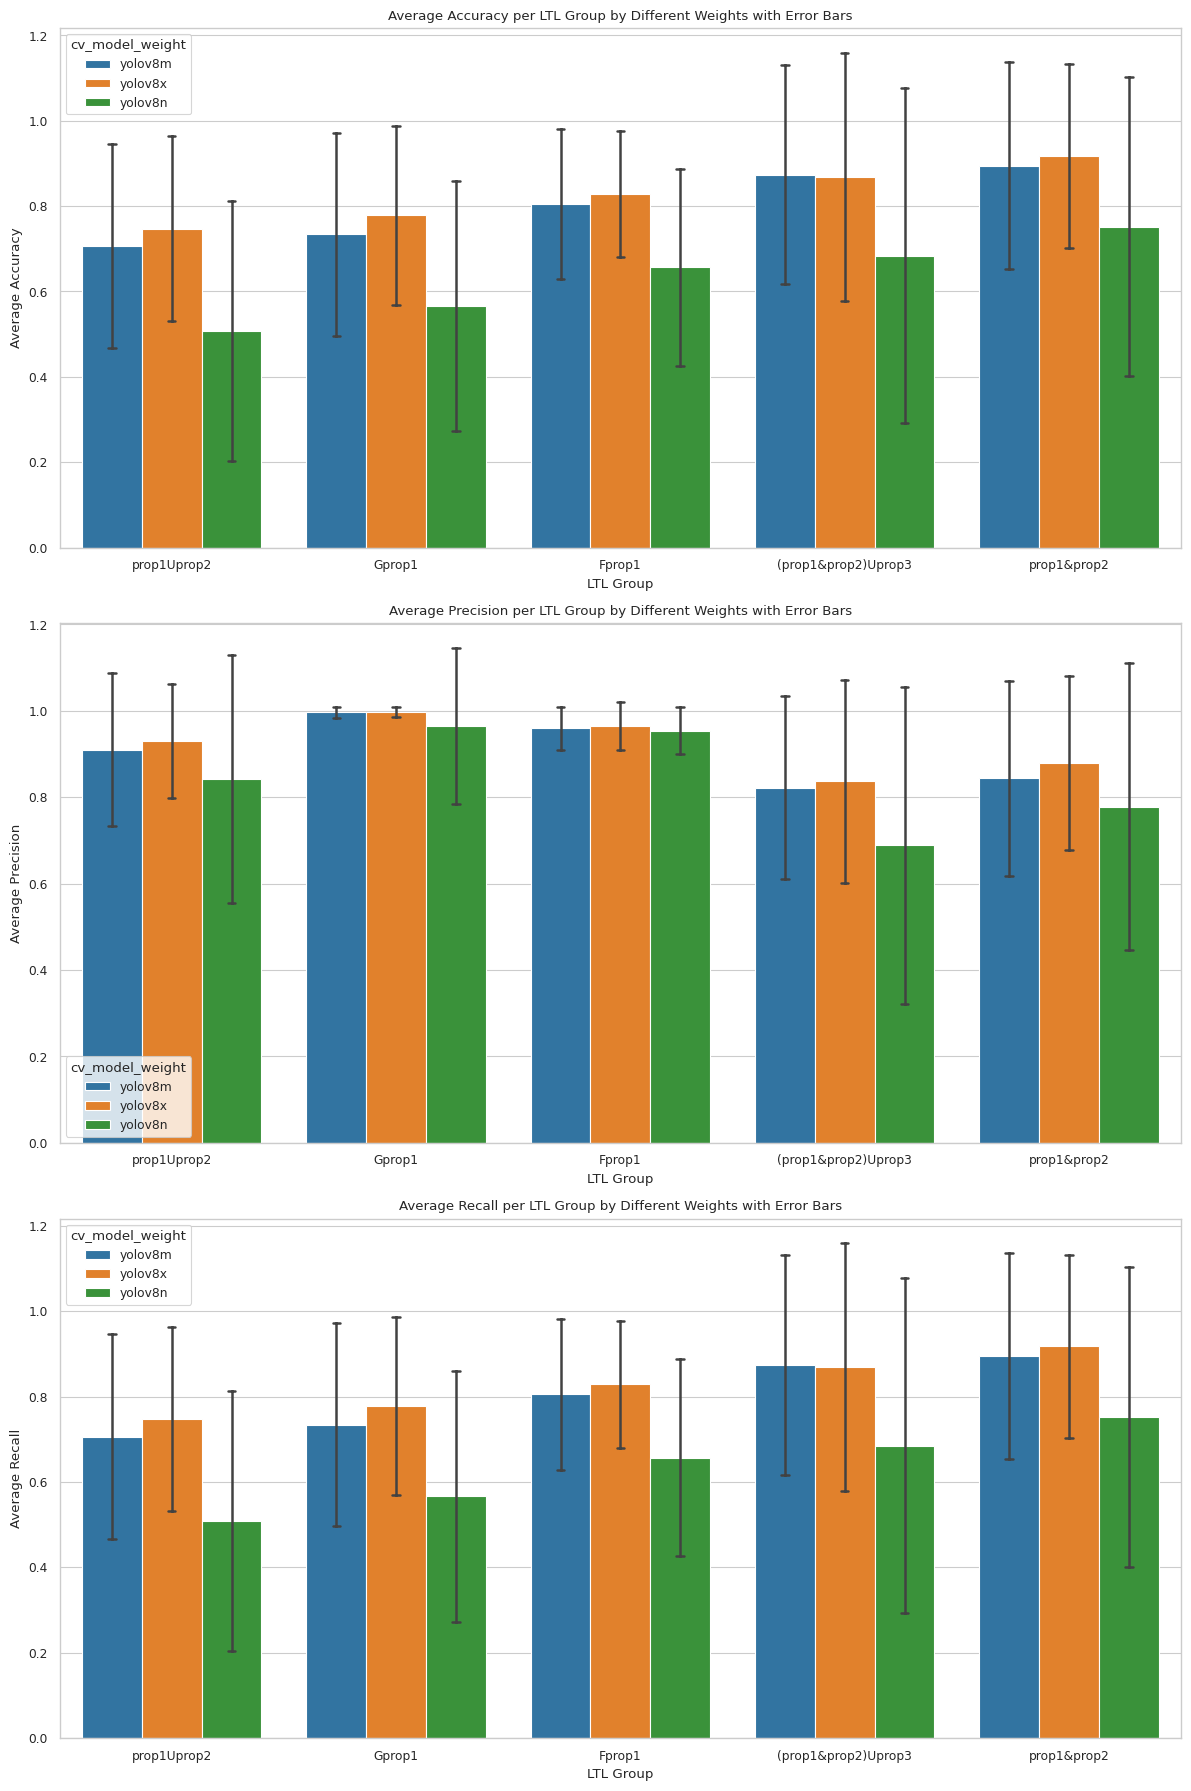

In [13]:
# Create subplots for accuracy, precision, and recall
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plotting Accuracy
sns.barplot(ax=axes[0], x="ltl_group", y="accuracy", hue="cv_model_weight", data=df, ci="sd", capsize=.1)
axes[0].set_title("Average Accuracy per LTL Group by Different Weights with Error Bars")
axes[0].set_xlabel("LTL Group")
axes[0].set_ylabel("Average Accuracy")

# Plotting Precision
sns.barplot(ax=axes[1], x="ltl_group", y="precision", hue="cv_model_weight", data=df, ci="sd", capsize=.1)
axes[1].set_title("Average Precision per LTL Group by Different Weights with Error Bars")
axes[1].set_xlabel("LTL Group")
axes[1].set_ylabel("Average Precision")

# Plotting Recall
sns.barplot(ax=axes[2], x="ltl_group", y="recall", hue="cv_model_weight", data=df, ci="sd", capsize=.1)
axes[2].set_title("Average Recall per LTL Group by Different Weights with Error Bars")
axes[2].set_xlabel("LTL Group")
axes[2].set_ylabel("Average Recall")

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

/tmp/ipykernel_716817/191481298.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='number_of_frame', y='accuracy', data=df, ci=None)


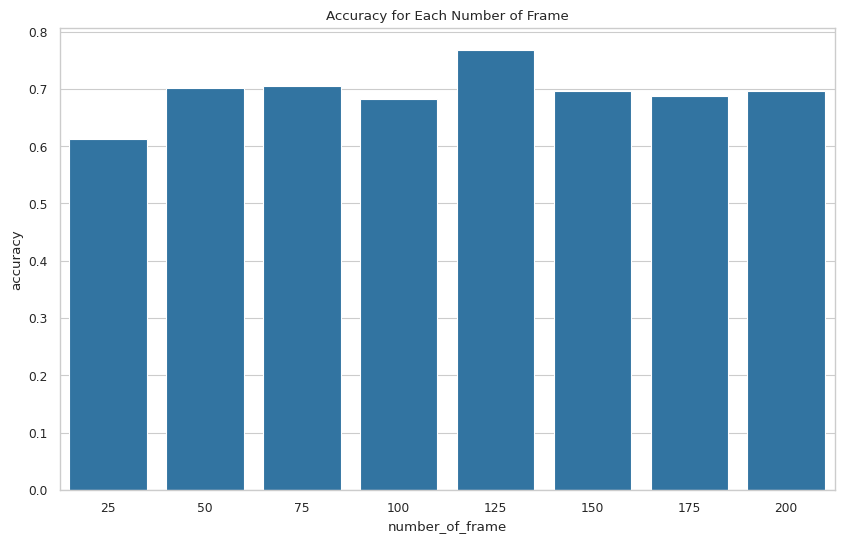

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(file_path)
header = ["dataset","ltl_group","ltl_formula","number_of_frame","cv_model","cv_model_weight","accuracy","precision","recall","f1_score","mapping_false_threshold","mapping_true_threshold","mapping_param_x0","mapping_param_k"]
df.columns = header

# Bar plot for accuracy for each number_of_frame
plt.figure(figsize=(10, 6))
sns.barplot(x='number_of_frame', y='accuracy', data=df, ci=None)
plt.title('Accuracy for Each Number of Frame')
plt.show()


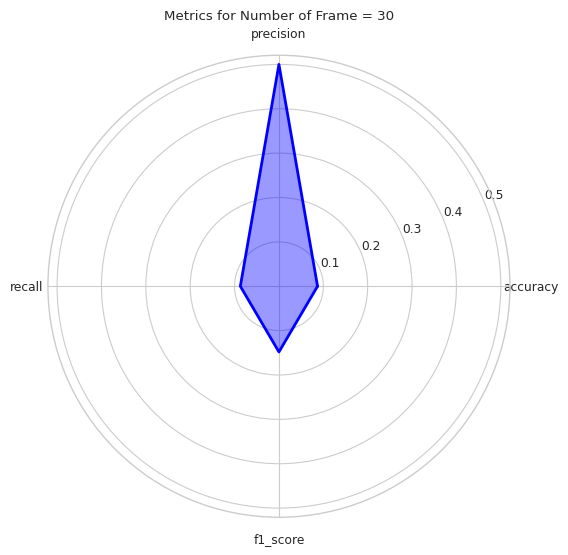

In [14]:
# Radar plot for comparing metrics for a specific number_of_frame
from math import pi

# Select a specific row for a specific number_of_frame
metrics = df[df['number_of_frame'] == 100].iloc[0]

# Categories of metrics
categories = ['accuracy', 'precision', 'recall', 'f1_score']
N = len(categories)

# Values of metrics
values = metrics[categories].values.flatten().tolist()
values += values[:1]

# Angles for each metric
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Radar plot
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories)
ax.plot(angles, values, color='b', linewidth=2)
ax.fill(angles, values, color='b', alpha=0.4)
plt.title('Metrics for Number of Frame = 30')
plt.show()


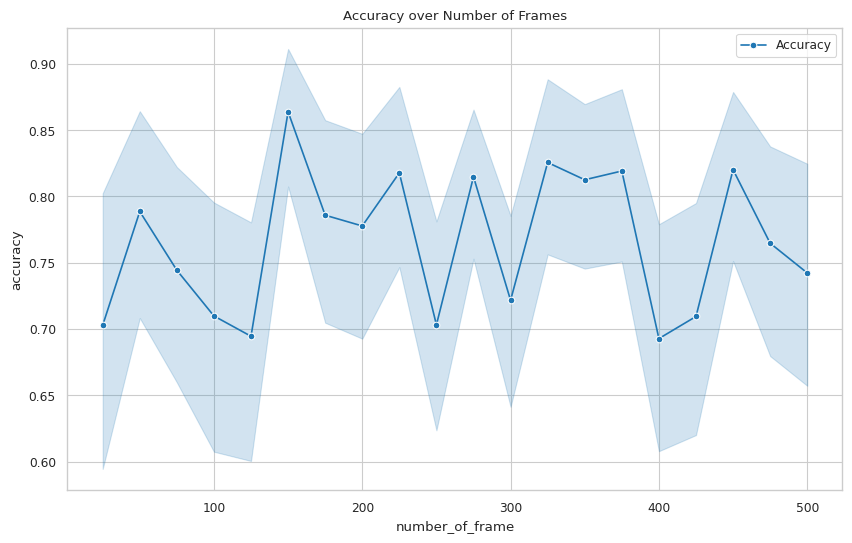

In [15]:
# Line plot for accuracy over number_of_frame
plt.figure(figsize=(10, 6))
sns.lineplot(x='number_of_frame', y='accuracy', data=df, marker="o", label='Accuracy')
plt.title('Accuracy over Number of Frames')
plt.grid(True)
plt.show()


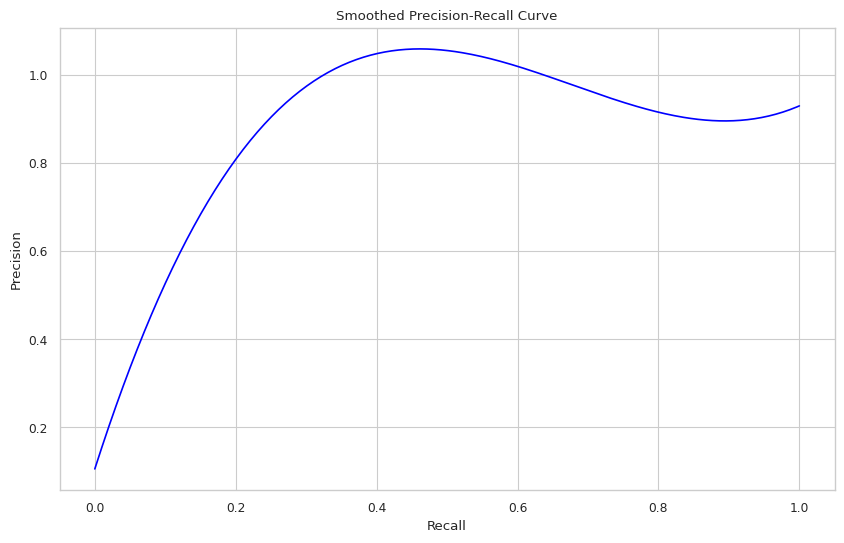

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import numpy as np


df.columns = header

# Sorting values by recall to make the line plot correct
df = df.sort_values(by='recall')

# Applying Univariate Spline smoothing
spl = UnivariateSpline(df['recall'], df['precision'])
recall_smooth = np.linspace(df['recall'].min(), df['recall'].max(), 300)
precision_smooth = spl(recall_smooth)

# Line plot for Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall_smooth, precision_smooth, linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Smoothed Precision-Recall Curve')
plt.grid(True)

# Show plot
plt.show()


In [1]:
import os

png_dir = '/opt/Neuro-Symbolic-Video-Frame-Search/store/nsvs_artifact/experiment_2.1_nsvs_ltl/yolo'  # change to your folder path
files = sorted([f for f in os.listdir(png_dir) if f.startswith('conf_')])


AttributeError: 'str' object has no attribute 'startswithswith'